In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
from MotionBERT.common_import import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
fig_num = 2
data_type_list = ['source_list', 'cam_param',
                  'cam_3d', 'img_2d',
                  ]
overwrite_list = []
dataset_name = 'h36m'
data_aug = default_data_aug.copy()
data = load_data_dict(dataset_name, data_type_list, overwrite_list, verbose=True, data_aug=data_aug)

[overwrite: False] ==> Loading H36M source_list...
[overwrite: False] ==> Loading H36M cam_param...
[overwrite: False] ==> Loading H36M cam_3d...
[overwrite: False] ==> Loading H36M img_2d...


In [11]:
source = 'S1_55011271_Walking'
subject, cam_id, action = split_source_name(source, dataset_name)
print(subject, cam_id, action)
cam_3d = data['cam_3d'][subject][action][cam_id].copy()
img_2d = data['img_2d'][subject][action][cam_id].copy()
cam_param = data['cam_param'][subject][action][cam_id].copy()
W, H, intrinsic = cam_param['W'], cam_param['H'], cam_param['intrinsic']
img_2d_norm = normalize_input(img_2d, W, H)

S1 55011271 Walking


### (a) original image plane

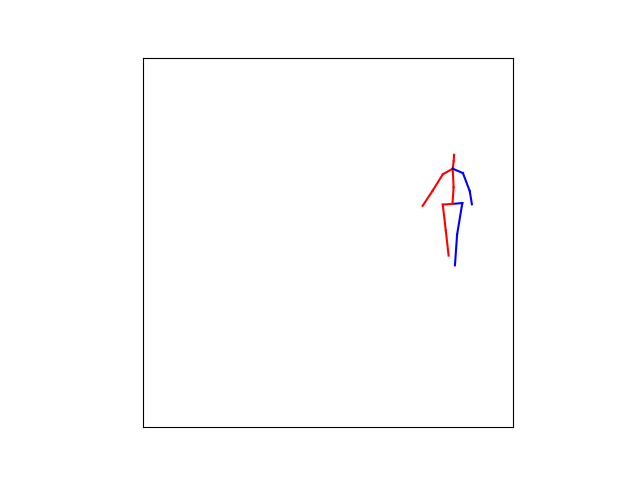

/home/lhs/codes/MotionBERT/custom_codes/figures/revolute/fig2/fig2_a.svg


In [12]:
sub_num = 'a'
frame_num = 200

configs = {
    'ax_2d': {'type': '2d', 'loc': 111, 'W': W, 'H': H},
}
fig, axs = generate_axes(0, configs, fig_title='')
plot_pose_setting = [
    ('ax_2d', img_2d, {'color': '', 'label': '2d', }),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num)
axs['ax_2d'].axes.xaxis.set_ticklabels([])
axs['ax_2d'].axes.xaxis.set_ticks([])
axs['ax_2d'].axes.set_xlabel('')
axs['ax_2d'].axes.yaxis.set_ticklabels([])
axs['ax_2d'].axes.yaxis.set_ticks([])
axs['ax_2d'].axes.set_ylabel('')
axs['ax_2d'].legend().remove()
axs['ax_2d'].set_title('')
plt.show()
save_folder = f'custom_codes/figures/revolute/fig{fig_num}'
if not os.path.exists(save_folder): os.makedirs(save_folder)
save_path = os.path.join(save_folder, f'fig{fig_num}_{sub_num}.svg')
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1, dpi=300)
print(os.path.abspath(save_path))

### (b) screen normalization

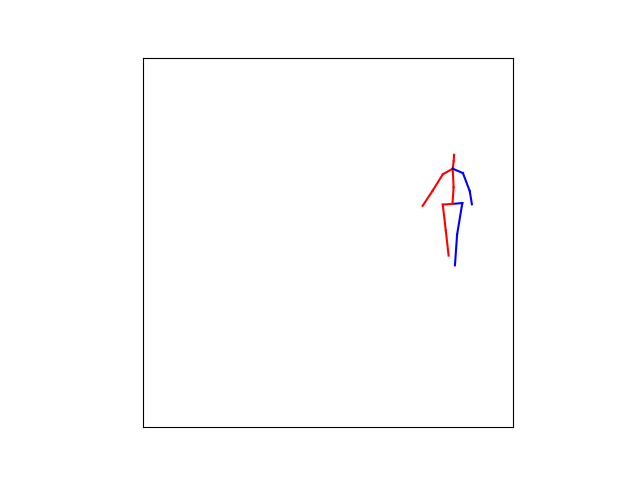

/home/lhs/codes/MotionBERT/custom_codes/figures/revolute/fig2/fig2_b.svg


In [15]:
sub_num = 'b'
frame_num = 200

configs = {
    'ax_2d': {'type': '2d', 'loc': 111, 'normalize': True},
}
fig, axs = generate_axes(1, configs, fig_title='')
plot_pose_setting = [
    ('ax_2d', img_2d_norm, {'color': '', 'label': '2d'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num)
axs['ax_2d'].axes.xaxis.set_ticklabels([])
axs['ax_2d'].axes.xaxis.set_ticks([])
axs['ax_2d'].axes.set_xlabel('')
axs['ax_2d'].axes.yaxis.set_ticklabels([])
axs['ax_2d'].axes.yaxis.set_ticks([])
axs['ax_2d'].axes.set_ylabel('')
axs['ax_2d'].legend().remove()
axs['ax_2d'].set_title('')
plt.show()
save_folder = f'custom_codes/figures/revolute/fig{fig_num}'
if not os.path.exists(save_folder): os.makedirs(save_folder)
save_path = os.path.join(save_folder, f'fig{fig_num}_{sub_num}.svg')
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1, dpi=300)
print(os.path.abspath(save_path))